# Project Title: 
## Drug Demand Forecasting for Pharmaceutical Inventory Optimization

## 1️⃣ Problem Statement

Pharmaceutical companies face significant challenges in maintaining optimal inventory levels due to fluctuating drug demand, seasonal variations, and unpredictable consumption patterns. Overstocking leads to increased holding costs and drug wastage due to expiration, while understocking can result in critical shortages affecting patient care.

The objective of this project is to build a machine learning–based demand forecasting system that predicts future demand for pharmaceutical drugs using historical sales data and relevant time-based features. The model aims to assist decision-makers in inventory planning, procurement optimization, and supply chain efficiency.

## Dataset Selection & Justification
*  **Selected Dataset**
    - The dataset used for this project is a publicly available pharmaceutical sales dataset obtained from Kaggle. The dataset contains historical sales records of pharmaceutical products at different time granularities, including hourly, daily, weekly, and monthly sales data.

    * For this project, the daily sales dataset (salesdaily.csv) was selected as the primary data source.

- **Reason for Choosing Daily Sales Data**
    - Daily-level data provides an optimal balance between granularity and noise for demand forecasting tasks:
    - It captures short-term demand fluctuations better than weekly or monthly data
    - It avoids excessive noise commonly present in hourly-level data
    - It is well-suited for inventory planning and replenishment decisions
    - It allows effective modeling of trend and seasonal patterns

## Dataset Overview

- The dataset consists of historical **daily pharmaceutical sales data**, where each row represents 
drug demand observed on a specific date.

- Key attributes include:
    - **Date of sale** (`datum`)
    - **Multiple drug category columns** representing daily demand for different pharmaceutical groups
    - **Time-based features** such as year, month, and weekday name

- To support inventory-level forecasting, demand values across individual drug categories are 
aggregated to create a single target variable representing **total daily drug demand**.


## Exploratory Data Analysis (EDA)

- Exploratory Data Analysis is performed to understand the structure, quality, and patterns 
present in the pharmaceutical sales data. The goal of EDA is to identify trends, seasonality, 
outliers, and data quality issues that may influence demand forecasting performance.


In [1]:
## Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load daily sales data
df = pd.read_csv(r"C:\Users\sande\Downloads\archive (7)\salesdaily.csv")
# Preview data
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [6]:
# Shape of dataset
df.shape

(2106, 13)

In [7]:
# Data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


In [8]:
# Statistical summary
df.describe()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


## Rename & Convert Date Column

In [9]:
# Rename date column for consistency
df.rename(columns={"datum": "date"}, inplace=True)
# Convert to datetime
df["date"] = pd.to_datetime(df["date"])
# Sort by date
df = df.sort_values("date")
df.head()

,date,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


### Missing Value Analysis

In [10]:
df.isnull().sum()

date            0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

### Identify Drug Category Columns

In [11]:
drug_cols = [
    "M01AB", "M01AE", "N02BA", "N02BE",
    "N05B", "N05C", "R03", "R06"
]

df[drug_cols].head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0
1,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0
2,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0
3,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0
4,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0


### Creating Target Variable (Total Daily Demand)

In [12]:
df["total_demand"] = df[drug_cols].sum(axis=1)
df[["date", "total_demand"]].head()

,date,total_demand
0,2014-01-02,48.47
1,2014-01-03,107.00
2,2014-01-04,91.35
3,2014-01-05,66.10
4,2014-01-06,58.20


### Target Variable Distribution

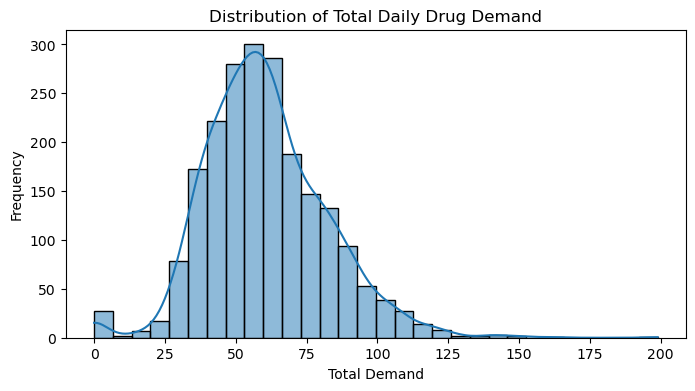

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df["total_demand"], bins=30, kde=True)
plt.title("Distribution of Total Daily Drug Demand")
plt.xlabel("Total Demand")
plt.ylabel("Frequency")
plt.show()

### Time Series Trend Analysis

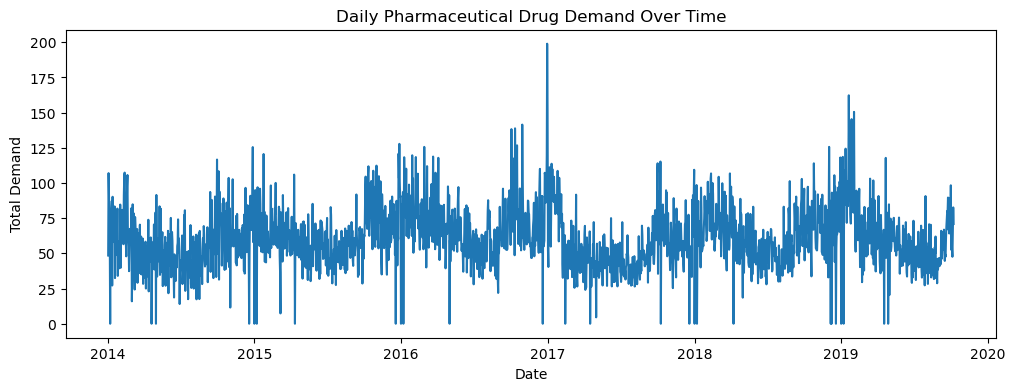

In [14]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["total_demand"])
plt.title("Daily Pharmaceutical Drug Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Total Demand")
plt.show()

### Monthly Seasonality Analysis

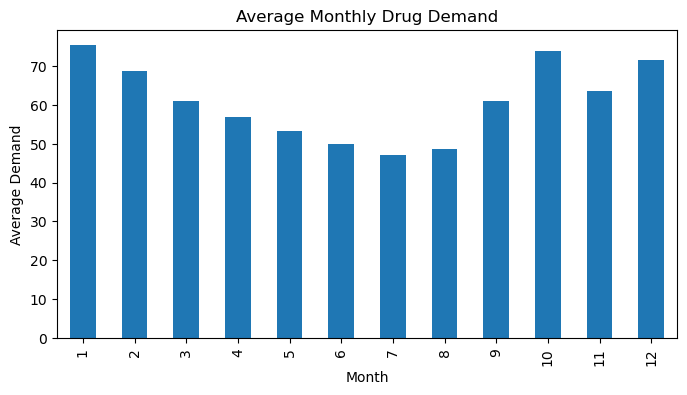

In [15]:
monthly_demand = df.groupby("Month")["total_demand"].mean()

plt.figure(figsize=(8,4))
monthly_demand.plot(kind="bar")
plt.title("Average Monthly Drug Demand")
plt.xlabel("Month")
plt.ylabel("Average Demand")
plt.show()

### Weekday Demand Pattern

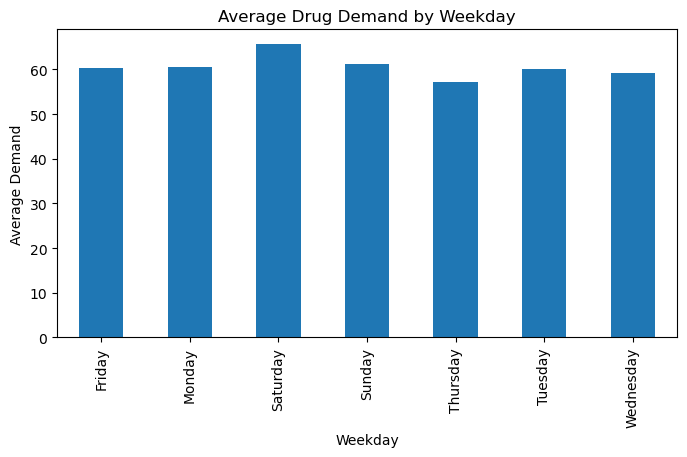

In [16]:
weekday_demand = df.groupby("Weekday Name")["total_demand"].mean()

plt.figure(figsize=(8,4))
weekday_demand.plot(kind="bar")
plt.title("Average Drug Demand by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Demand")
plt.show()

### Drug Category Contribution Analysis

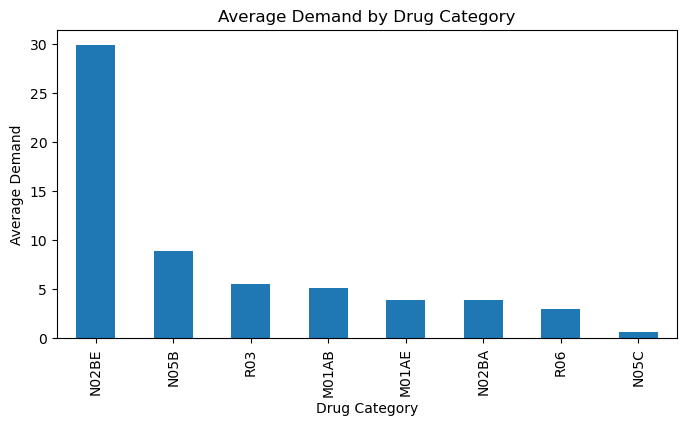

In [17]:
category_demand = df[drug_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
category_demand.plot(kind="bar")
plt.title("Average Demand by Drug Category")
plt.xlabel("Drug Category")
plt.ylabel("Average Demand")
plt.show()

### Outlier Detection

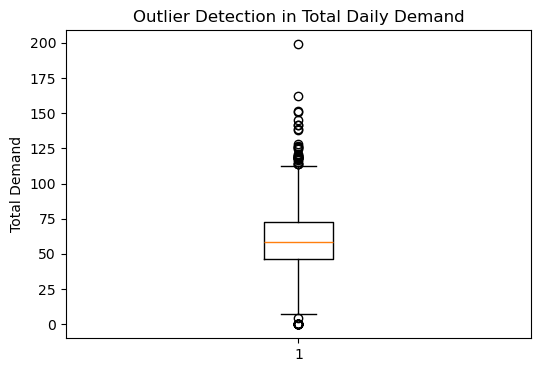

In [18]:
plt.figure(figsize=(6,4))
plt.boxplot(df["total_demand"])
plt.title("Outlier Detection in Total Daily Demand")
plt.ylabel("Total Demand")
plt.show()

### Correlation Analysis

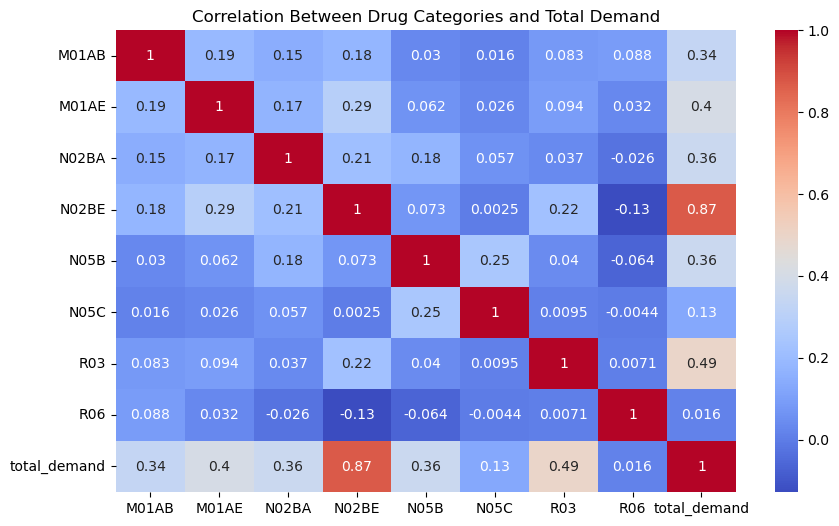

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df[drug_cols + ["total_demand"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Drug Categories and Total Demand")
plt.show()


In [20]:
df.to_csv("processed_daily_demand.csv", index=False)